In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression

In [26]:
x = pd.read_csv(r'C:\Users\mandar patil\Downloads\Logistic_X_Train.csv')
y = pd.read_csv(r'C:\Users\mandar patil\Downloads\Logistic_Y_Train.csv')
x1 = pd.read_csv(r'C:\Users\mandar patil\Downloads\Logistic_X_Test.csv')


In [27]:
class1 = x.loc[(y['label']==0)]
class2 = x.loc[(y['label']==1)]

In [28]:
model=LogisticRegression()
model.fit(x,y)
coeff=model.coef_
intercept=model.intercept_
print(coeff,intercept)

[[-3.92798396  3.10147056 -2.28040541]] [-4.27017148]


C:\Users\mandar patil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
output=model.predict(x1)
class0_prediction=x1.loc[(output==0)]
class1_prediction=x1.loc[(output==1)]
df=pd.DataFrame(output)
print(' classification of chemicals is:')
df

 classification of chemicals is:


,0
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


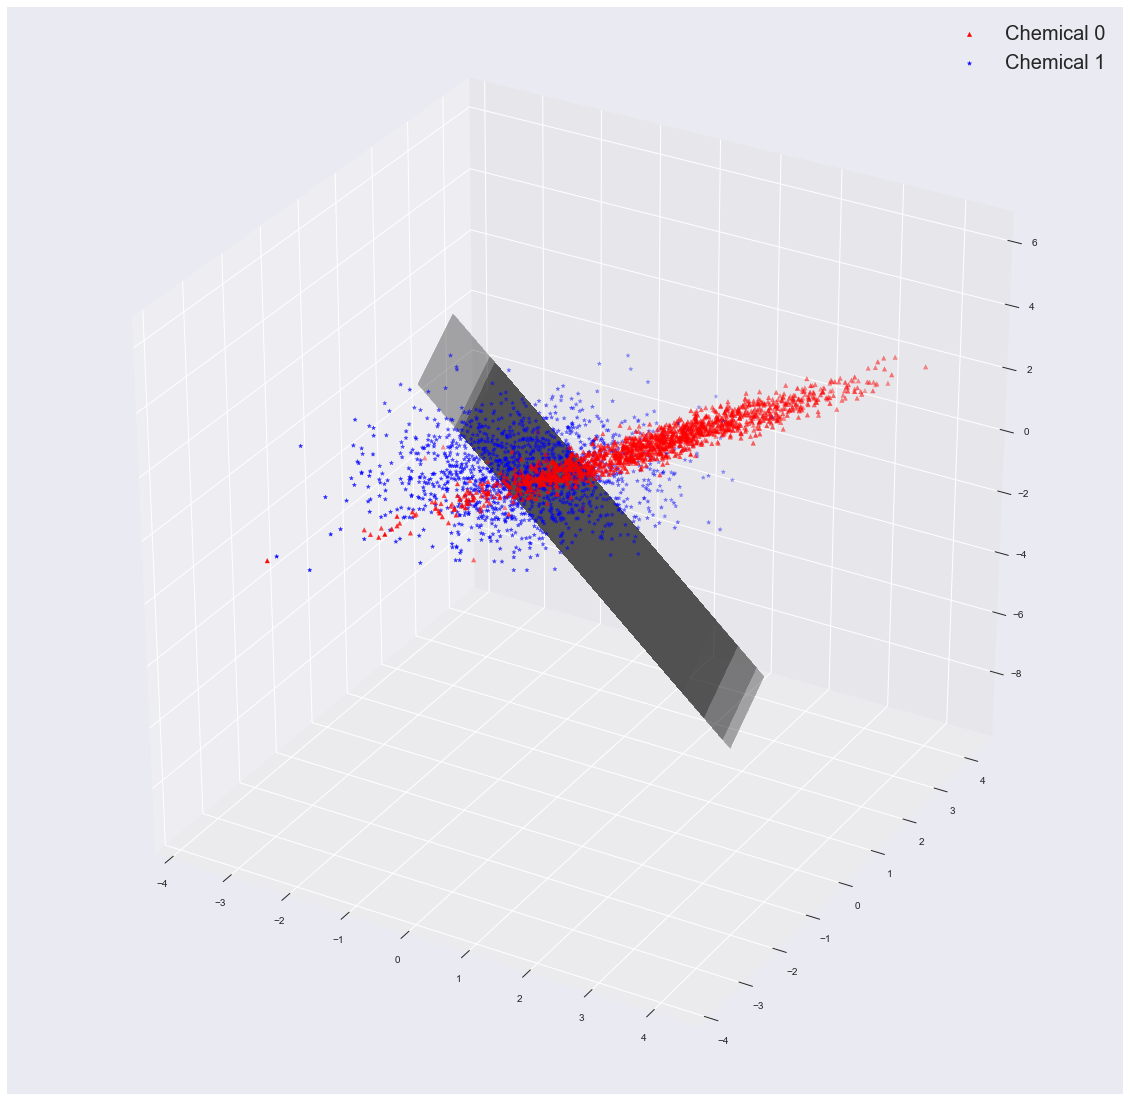

In [30]:
fig = plt.figure(figsize=(20,20))
axs=plt.axes(projection='3d')
axs.scatter3D(class1['f1'],class1['f2'],class1['f3'],label='Chemical 0',color='red',marker='^')
axs.scatter3D(class2['f1'],class2['f2'],class2['f3'],label='Chemical 1',color='blue',marker='*')
x2=x1['f1']
y2=x1['f2']
axs.plot_surface(xx,yy,z,alpha=0.01,color='gray')
axs.legend(fontsize=20)

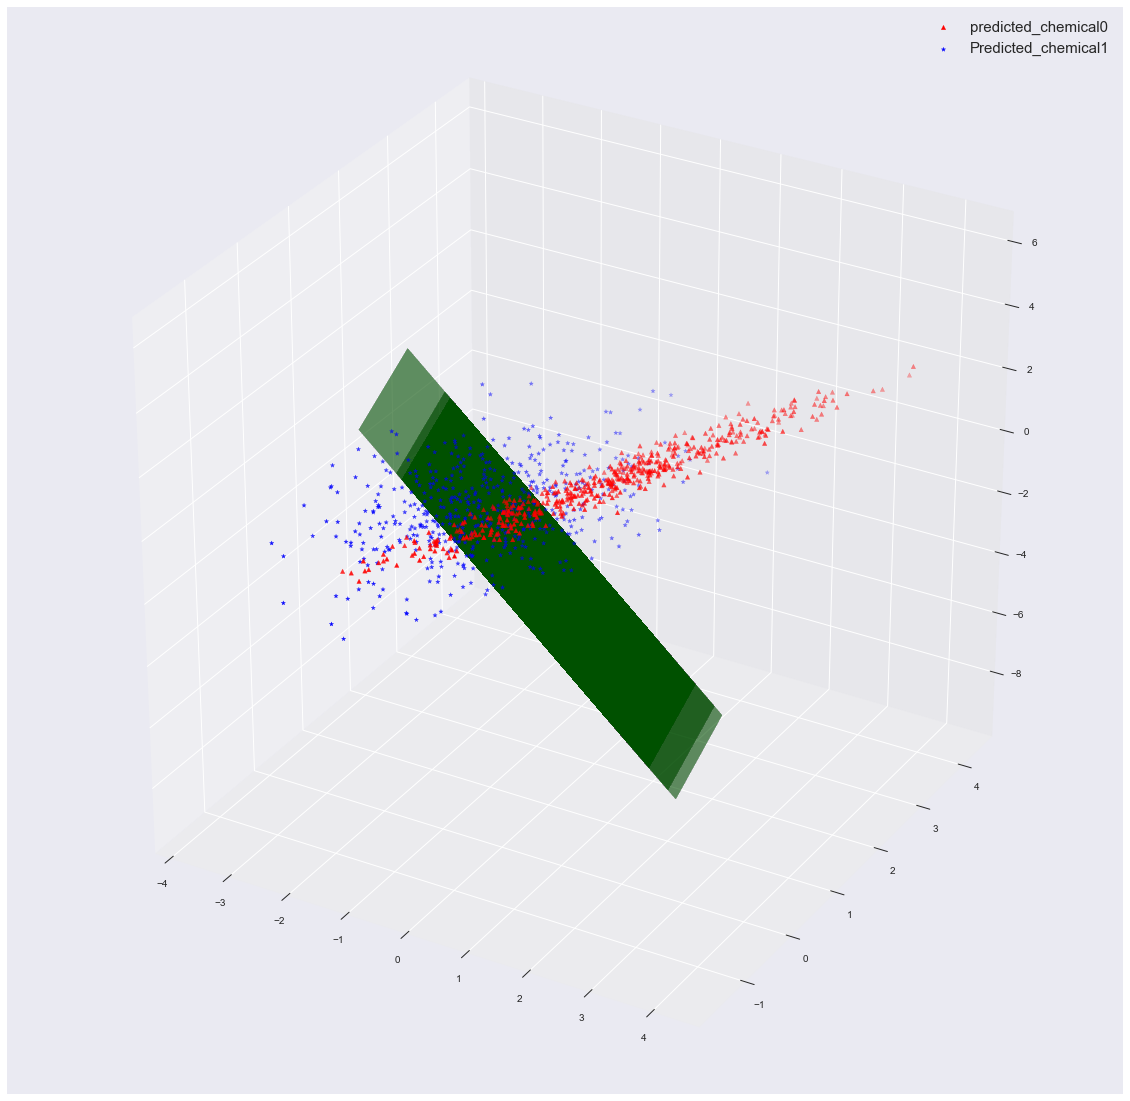

In [31]:
fig = plt.figure(figsize=(20,20))
axs=plt.axes(projection='3d')
xx, yy = np.meshgrid(x, y)
z=-((coeff[0][1]*yy+coeff[0][0]*xx+intercept)/coeff[0][2])
axs.plot_surface(xx,yy,z,alpha=0.02,color='green')
axs.scatter3D(class0_prediction['f1'],class0_prediction['f2'],class0_prediction['f3'],marker='^',label='predicted_chemical0',color='red')
axs.scatter3D(class1_prediction['f1'],class1_prediction['f2'],class1_prediction['f3'],marker='*',label='Predicted_chemical1',color='blue')
axs.legend(fontsize=15)